In [2]:
from manim import *
import pandas as pd

In [18]:
INPUT_FILE_PATH = "../TP1/data/example_input.txt"
OUTPUT_FILE_PATH = "../TP1/data/output.txt"

with open(INPUT_FILE_PATH, 'r') as f:
    N = int(f.readline().rstrip())
    L = int(f.readline().rstrip())
    M = int(f.readline().rstrip())
    Rc = float(f.readline().rstrip())

particles_df = pd.read_table(
    INPUT_FILE_PATH,
    delim_whitespace=True,
    names=["id ", "x", "y", "r"],
    skiprows=4
)

with open(OUTPUT_FILE_PATH) as f:
    target_neighbours_ids = {k: v for k, *v in (line.split() for line in f.readlines())}

In [19]:
print(f"""N={N}, L={L}, M={M}, Rc={Rc}""")
particles_df

N=100, L=100, M=8, Rc=10


,id,x,y,r
0,0,86.936856,45.316160,1.837293
1,1,82.318046,76.008945,3.305538
2,2,22.993498,68.493791,1.627378
3,3,60.956702,20.500474,4.665454
4,4,63.602024,84.976375,1.605259
...,...,...,...,...
95,95,94.441307,95.527458,3.496390
96,96,54.019573,37.405162,1.349673
97,97,95.218237,52.354568,3.471978
98,98,43.788607,19.748488,3.370142


In [20]:
# out_particles_df

In [21]:
# TODO: agarar del archivo los vecinos de forma correcta y pasarlo a un diccionario de listas
# target_neighbours_ids = out_particles_df.loc[out_particles_df.iloc[1] == "TARGET_PARTICLE_ID"]
target_neighbours_ids

{'29': ['2', '11', '33', '42', '51', '59', '66', '67', '78', '85'],
 '12': ['36', '38', '48', '63', '76', '79', '87'],
 '41': ['0', '15', '17', '31', '91'],
 '92': ['11', '51', '66', '69', '75', '78', '85'],
 '48': ['12', '16', '27', '42', '53', '63'],
 '65': ['14',
  '19',
  '24',
  '27',
  '38',
  '40',
  '49',
  '53',
  '71',
  '81',
  '87',
  '89',
  '93',
  '98'],
 '31': ['17', '41', '96', '99'],
 '32': ['56', '62', '90'],
 '77': ['55', '74', '86', '94'],
 '78': ['2', '11', '29', '51', '57', '66', '67', '69', '75', '85', '92'],
 '40': ['3',
  '16',
  '21',
  '24',
  '27',
  '28',
  '62',
  '65',
  '70',
  '71',
  '72',
  '89',
  '98'],
 '38': ['8', '12', '14', '19', '24', '43', '65', '79', '81', '83', '87', '93'],
 '84': ['35', '50', '54', '64'],
 '70': ['3', '16', '21', '28', '39', '40', '89', '98', '99'],
 '81': ['8', '14', '19', '24', '38', '43', '49', '65', '79', '83', '87', '93'],
 '20': ['46'],
 '91': ['17', '41'],
 '67': ['2', '11', '29', '33', '42', '51', '59', '63', '66',

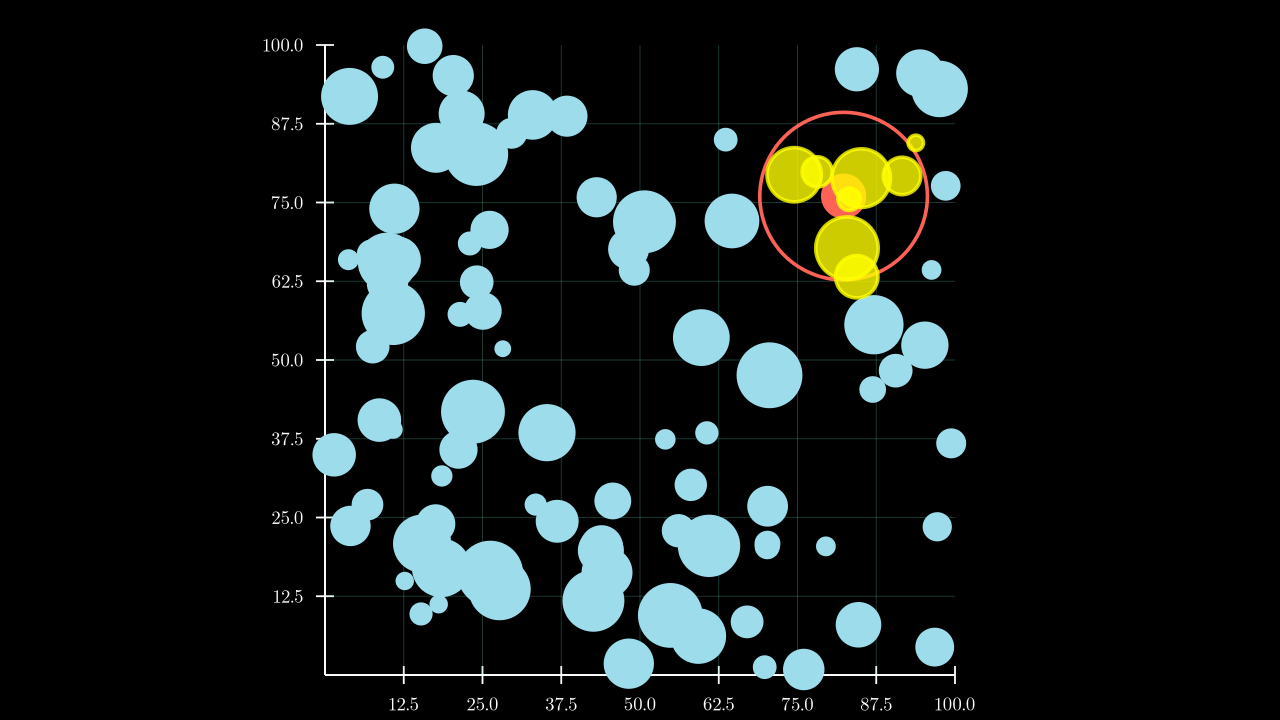

In [33]:
%%manim -qm -v WARNING CellIndexMethodScene

TARGET_PARTICLE_ID = "1"

class CellIndexMethodScene(Scene):
    
    def construct(self):
        self.add(self.axes, self.domain, *self.particles)
        
    @property
    def particles(self):
        particles = []
        for _, row in particles_df.iterrows():
            alpha = self.axes.c2p(1,0)[0] - self.axes.c2p(0,0)[0]
            scalated_radius = row["r"] * alpha
            current_id = str(int(row[0]))
            if current_id == TARGET_PARTICLE_ID:
                particle = Circle(radius=scalated_radius, color=RED, fill_opacity=1).move_to(self.axes.c2p(row["x"], row["y"], 0))
                particles.append(Circle(radius=(Rc + row["r"]) * alpha, color=RED).move_to(self.axes.c2p(row["x"], row["y"], 0)))
            elif current_id in target_neighbours_ids[TARGET_PARTICLE_ID]:
                particle = Circle(radius=scalated_radius, color=YELLOW, fill_opacity=0.8, stroke_opacity=0.8).move_to(self.axes.c2p(row["x"], row["y"], 0))
            else:
                particle = Circle(radius=scalated_radius, color=BLUE_B, fill_opacity=1).move_to(self.axes.c2p(row["x"], row["y"], 0))
            particles.append(particle)
        return particles
    
    @property
    def domain(self):
        return NumberPlane(
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 1,
                "stroke_opacity": 0.3
            },
            x_range=self.cels_tuple,
            y_range=self.cels_tuple,
            x_length=7,
            y_length=7,
        )
        
    @property
    def axes(self):
        return Axes(
            x_range=self.cels_tuple,
            y_range=self.cels_tuple,
            x_length=7,
            y_length=7,
            axis_config={
                "font_size": 20,
            },
            tips=False,
        ).add_coordinates()

        
    @property
    def cels_tuple(self):
        """
        The number of cels is defined by M*M, 
        this vector represents the [x_min, x_max, x_step]
        """
        return [0, L, L / M]
